I talked a series of Artificial Neural Network (ANN) tutorial last year for a workshop, where I showed the very basics. But there are more people asking me some details, which I will cover some of them this week. Hope this will be useful to you. 

## How to select the parameters

We talked about the hidden neurons in the hidden layer, you may ask 'How do we select the number of neurons?' The way I select the number of neurons in the hidden layer is the 10 fold [cross-validtion](https://en.wikipedia.org/wiki/Cross-validation_(statistics)). This is a very common way in machine learning community to find good parameters, it works as shown in the following figure. 

![jpg](https://raw.githubusercontent.com/qingkaikong/blog/master/2017_05_More_on_applying_ANN/figures/figure_1.jpg)

In k-fold cross-validation, the original sample is randomly partitioned into k subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds then can be averaged (or otherwise combined) to produce a single estimation. 

Therefore, the 10 fold cross-validation means I split the data into 10 subgroups, and use 9 of them training, and the other 1 to test the result. You can also use this method for other parameters.   

There are also other ways to select the parameters, like grid-search and so on. I will not talk here, since I like to use 10 fold cross-validation most of the time.   

## When to stop training  

When training a neural network, we will do many iterations to update the weights. But when do we decide to stop? Let me show you the following figure, and then you will know when to stop.   

![jpg](https://raw.githubusercontent.com/qingkaikong/blog/master/2017_05_More_on_applying_ANN/figures/figure_2.jpg)

The green curve is the training error, which is the error that we get when we run the trained model back on the training data. The red curve is the validation error, which is the error when we get when we run the trained model on a set of data that it has previously never been exposed to (this is also why this data is called validation data, since it is not used in training, and we keep it for validation purposes). We can see that the green training error is constantly decreasing, but at certain point, the decreasing validation error starts to increase. This usually happens when the model starts [overfitting](https://en.wikipedia.org/wiki/Overfitting) the data, which means that the model is excessively complex, that it is too flexible, it starts to model the noise instead of the hidden patterns. The following is an example (figure from Wikipedia). 

![jpg](https://raw.githubusercontent.com/qingkaikong/blog/master/2017_05_More_on_applying_ANN/figures/figure_3.jpg)


We can build two models to separate the green and blue dots: one model is the black line, and the other is the green curve. We can see the green curve fits the data really well, it separates the green and blue dots without any mistake! The error associates with it is zero! But which model do you think is a better model? Of course, most of us will choose the black model (if you choose the green model, I don't know what to say ...). Even though the black model made some wrong decisions for some training data points, but it will perform better than the green model when applied to new data. The green model fits too much noise, and it becomes so wiggly. If we keep a validation dataset that never used in training the model, we will find that the green model will make more wrong decisions, this will show on the validation error. Therefore, we should stop at the point where we can see a trend the red validation error starts to take off, showing as the black dotted line in the previous figure.     



## More on learning rate



We didn't talk too much about the gradient descent method before, but you can check out this awesome blog to get more sense - [Single-Layer Neural Networks and Gradient Descent](http://sebastianraschka.com/Articles/2015_singlelayer_neurons.html). But we do talked about learning rate before, if you still remember, it will control how fast we will learn by control how much we will update the weights. I grab the following figure from the blog, to show you the effect of large and small learning rate. 

![png](https://raw.githubusercontent.com/qingkaikong/blog/master/2017_05_More_on_applying_ANN/figures/figure_4.png)  

The above figure shows a simple example the effect of using a large and small learning rate. We can see the horizontal axis is the our weight, and the vertical axis is the cost function. We can think this as a topographic area in our parameter space (in this case, is the weight). The gradient descent method is to find the steepest direction to our next step by taking the gradient of the topographic area, and to this direction. We want to search for the lowest point in this topographic area (finding the minimum). We can see, if we use a large learning rate, the search will bounce back and forth around the minimum. But if we use a small learning rate, evertime we move our search with a small step, it will take very long time to find the lowest point, and sometimes trap our search into a local minima instead of the global minimum (as shown in the figure, and we will talk it more in the next section). We can see the smaller learning rate is more stable. It seems using either small or large learning rate is not sufficient to have a good training schema, the best way is to use both: an adaptive learning rate. This means that we start with large learning rate, but with more and more iterations, we will shrink the learning rate accordingly. We can think this as at the beginning, we use large learning rate to do coarse search with large move steps, but when we approach the minimum, we use smaller learning rate to do a fine search in this area. 


## Momentum

The following figure (from [here](https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html)) shows the complexity of the search for global minimum. Since most of the times, we will have something not as simple as the previous figures with only one minimum. Instead, we see a very hilly area, that full of different local minima. It is very easy for our search find a local minima, and stop searching for a better one. For example, the blue ball stopped in a minima that is not the global minimum. We can train the algorithm multiple times, and everytime start at a different initial location, in the hope that we can start at a place where equal to the global minimum, or at least close to. 

![png](https://raw.githubusercontent.com/qingkaikong/blog/master/2017_05_More_on_applying_ANN/figures/figure_5.png) 

Also, we can also try to make it less likely that teh algorithm will get stuck in local minima. Let's look at the above figure, the reason the ball stop in the local minima is due to run out of energy when it rolling down. If we give the ball some weight, when it is rolling down from a higher place, it will likely have a momentum to overcome a small hill on the other side of the local minimum. This idea can be implemented by using a momentum term in the update of the weights. You can check out more explainations on [Quora](https://www.quora.com/What-is-an-intuitive-explanation-of-momentum-in-training-neural-networks). Now, let's take a rest and look at the following movie to get a sense why the ball did stop at some local traps while have some fun!


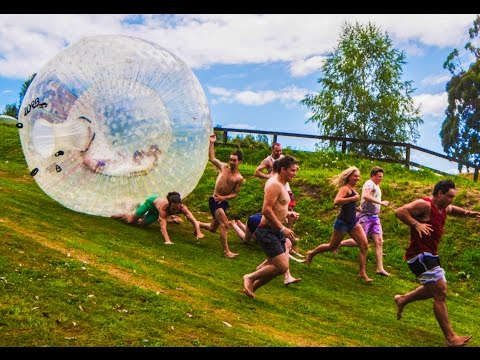

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("qPKKtvkVAjY")